<a href="https://colab.research.google.com/github/u-aaa/AIsaturday_abuja/blob/master/141.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project

## Background

We are glad you have successfully reached the capstone project part of "Data Science Fundamentals" course. You will put everything 
you have learned so far about data science to work. The outcome of this module should potentially serve as your portfolio item.

Unlike with previous projects, this time you are free to choose a dataset to explore from three suggested ones. As you will have to solve a provided problem, there will not be list of predefined questions that you have to answer - be creative and explore any dimensions of data you deem worth analyzing.

Although this might seem scary, this is how data science looks like in the industry. Often, it's your responsibility to not only give answers using the data, but also raise questions. The more creatively you look at this project, the better. Good luck!

----

## Requirements

Whichever problem you choose to analyze, general requirements are as follow:

#### Exploratory Data Analysis
* Describe the data with basic statistical parameters - mean, median, quantiles, etc. Use parameters that give you the most important statistical insights of the data.
* Grouping the data and analyzing the groups - using Pandas aggregate methods.
* Work with features - handle missing data if needed, use pandas date APIs.
* Manipulate datasets - use joins in needed.
* Visualize the data - you can use line, scatter, histogram plots, density plots, regplots, etc.

#### Statistical hypothesis testing
* Use at least one statistical significance test.
* Report p-values.
* Use visualizations.

#### Modeling
* Visualize data with dimensionality reduction algorithms.
* Perform cluster analysis.
* Use a linear model to explain relationships and predict new values.

#### Presentation
* Present the project - the data, methods and results.

## Problems

#### Fatal Police Shooting in United States

<div><img width="400px" height="auto" src="https://images.unsplash.com/photo-1606352466047-7cef02b312bb?ixlib=rb-1.2.1&ixid=MXwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHw%3D&auto=format&fit=crop&w=1662&q=80" /></div>

[Police brutality in the United States](https://en.wikipedia.org/wiki/Police_brutality_in_the_United_States) has been an nationwide issue since the 20th century. Public safety of U.S. citizens is a typical argument to justify the controversially high number of fatal shootings.

You are a contractor to the United States Department of Justice. **You have been given a case to investigate fatal police shootings throughout the United States of America, provide a list of issues, and propose a plan on how to tackle these issues**.

The department offered some tips - the public opinion indicates that there's something systematically fishy of police actions against civilians, some states differ from other, some cities are different from others, race equality is still an unanswered question, there's some talk about huge spendings on police, rumors about mental issues of those getting shot. Government is all about prioritizing - use the data to list issues with the police activity and propose a plan which issues to tackle first and how.

Your are given 1 dataset to start with. Try to search for more datasets to enrich your data analysis.

Here's the dataset:

* [Fatal Police Shootings in the U.S. '15 - '17](https://www.kaggle.com/washingtonpost/police-shootings).

## Evaluation Criteria

- Code quality
- Fulfillment of the idea
- Adherence to the requirements
- Delivery of the presentation

#### Statistical hypothesis testing
- Correct statistical test method is used, based on the situation.
- Reasoning on chosen statistical significance level.

#### Modeling
- Both PCA and T-SNE algorithms are used.

# Import datasets and Libraries

##Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
from statsmodels.stats.proportion import proportions_ztest
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn. linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans

## Importing the main dataset

In [2]:
gsheetkey = '1xyUXF-8kioBH51NOsMfYUSusEDeCq71VsScU54zIc-4'
data_url = f'https://docs.google.com/spreadsheet/ccc?key={gsheetkey}&output=csv'
data = pd.read_csv(data_url)

##Secondary data sources

Secondary sources include:
 
*   Population data for states for 2015 - 2017 : https://www.kff.org/other/state-indicator/distribution-by-raceethnicity/?dataView=1&currentTimeframe=4&
*   US states and state code (2015 - 2017) - https://raw.githubusercontent.com/cmdlinetips/data/master/us_states.tsv
*   US Gun law score card by states (2015 - 2017) - https://giffords.org/scorecard2016/

In [3]:
gsheetkey_15 = '1OlzAzJ_UpZy77kKl08y3p_3yR72lbvYjCykYqDjwbEU'
data_url_15 = f'https://docs.google.com/spreadsheet/ccc?key={gsheetkey_15}&output=csv'
pop_2015 = pd.read_csv(data_url_15)

In [4]:
gsheetkey_16 = '1ZkK3Wyxx9IuFzADL3gZDvNaNal9S-H5vdNheTbVrKC8'
data_url_16 = f'https://docs.google.com/spreadsheet/ccc?key={gsheetkey_16}&output=csv'
pop_2016 = pd.read_csv(data_url_16)

In [5]:
gsheetkey_17 = '1y2PplgjLi_2Ot7BnygR-rewJt8nHL8Cok_p5C8Zvv3c'
data_url_17 = f'https://docs.google.com/spreadsheet/ccc?key={gsheetkey_17}&output=csv'
pop_2017 = pd.read_csv(data_url_17)

In [6]:
states_df = pd.read_csv("https://raw.githubusercontent.com/cmdlinetips/data/master/us_states.tsv", sep="\t")

In [7]:
gsheetkey_gun = '1Wx3WZQ688ZYuu-A8rX91M57FUue_n0Wku2JaGhBY6Z4'
data_url_gun = f'https://docs.google.com/spreadsheet/ccc?key={gsheetkey_gun}&output=csv'
gun_control = pd.read_csv(data_url_gun)

#Exploratory data analysis

##Data discovery

In [8]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [9]:
data.shape

(2142, 14)

The data has 2142 rows and 14 columns

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2142 non-null   int64  
 1   name                     2123 non-null   object 
 2   date                     2142 non-null   object 
 3   manner_of_death          2142 non-null   object 
 4   armed                    2136 non-null   object 
 5   age                      2099 non-null   float64
 6   gender                   2141 non-null   object 
 7   race                     2039 non-null   object 
 8   city                     2142 non-null   object 
 9   state                    2142 non-null   object 
 10  signs_of_mental_illness  2142 non-null   bool   
 11  threat_level             2142 non-null   object 
 12  flee                     2106 non-null   object 
 13  body_camera              2142 non-null   bool   
dtypes: bool(2), float64(1), 

There's no missing data for date, manner of death, state, city, signs_of_mental_illness, threat level and body camera, but there are some missing data in the other columns. The null values will be replaced to make analysis easier.

In [11]:
data.drop(['date', 'id'],1).describe(include='all')

,name,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
count,2123,2142,2136,2099.000000,2141,2039,2142,2142,2142,2142,2106,2142
unique,2118,2,64,NaN,2,6,1247,51,2,3,4,2
top,Michael Johnson,shot,gun,NaN,M,W,Los Angeles,CA,False,attack,Not fleeing,False
freq,2,1992,1173,NaN,2052,1041,31,355,1612,1381,1453,1913
mean,NaN,NaN,NaN,36.484516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,12.874000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observations:
1. Not all names are unique, there are only 2,118 unique names out of 2123 names - this means that there may be some duplicates and/or people sharing the same names in the dataset. There are also some missing names in the dataset.
2. There are only 2 manner of deaths
3. The mean age of people killed is 36. The youngest age is 6 and the oldest is 86 years.
4. There are 2 unique genders and there are more male than female in the dataset.
5. There are 6 unique races. White is the most frequent in the dataset.
6. California has the highest number of shootings of the 51 states.
7. Most of the people shot by the police did not show any signs of mental illness.
8. Most of the individuals were also not fleeing and did not wear a body camera.

###Handling missing data

First, look for duplicated names/observations in the dataset.

In [12]:
data[data.duplicated('name', keep= False)].sort_values(by= 'name', ascending = True)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
209,229,Brandon Jones,2015-03-19,shot,unarmed,18.0,M,B,Cleveland,OH,False,attack,Not fleeing,False
1780,1991,Brandon Jones,2016-10-25,shot,toy weapon,25.0,M,W,Elkton,MD,True,attack,Not fleeing,False
976,1129,Daquan Antonio Westbrook,2015-12-24,shot,gun,18.0,M,B,Charlotte,NC,False,attack,Not fleeing,False
1934,2158,Daquan Antonio Westbrook,2016-12-24,shot,gun,18.0,M,B,Charlotte,NC,False,undetermined,Not fleeing,False
249,291,Eric Harris,2015-04-02,shot,unarmed,44.0,M,B,Tulsa,OK,False,other,Not fleeing,False
1093,1252,Eric Harris,2016-02-08,shot,vehicle,22.0,M,B,New Orleans,LA,False,other,Car,False
2049,2304,Jamake Cason Thomas,2017-02-03,shot,gun,22.0,M,B,Rowland,NC,False,attack,Car,False
2053,2294,Jamake Cason Thomas,2017-02-03,shot,gun,22.0,M,B,Rowland,NC,False,attack,Car,False
1342,1526,Michael Johnson,2016-05-09,shot,gun,26.0,M,W,Chicago,IL,False,other,Foot,False
1398,1586,Michael Johnson,2016-06-01,shot,gun,21.0,M,B,Newnan,GA,False,attack,Foot,True


There are 4 duplicated names. It appears two of the names are duplicated observations - Daquan Antonio Westbrook and Jamake Cason Thomas. These rows will be dropped.

In [13]:
data.drop(index=[1934, 2053], axis = 0, inplace= True)

Replacing null values....

In [14]:
data['name'] = data['name'].fillna(value = 'unknown')
data['armed'] = data['armed'].fillna(value = 'undetermined')
data['gender'] = data['gender'].fillna(value = 'unknown')
data['race'] = data['race'].fillna(value = 'unknown')
data['flee'] = data['flee'].fillna(value = 'unknown')

##Data Analysis

Analysing the period of the dataset

In [15]:
data['year'] = pd.DatetimeIndex(data['date']).year
data['month'] = pd.DatetimeIndex(data['date']).strftime('%B')

In [16]:
grouped_year = data.groupby('year')
grouped_year.agg(Minimum_Date=('date', np.min), Maximum_Date=('date', np.max))

,Minimum_Date,Maximum_Date
year,,
2015,2015-01-02,2015-12-31
2016,2016-01-01,2016-12-31
2017,2017-01-01,2017-02-28


The data is is complete for 2015 and 2016, but covers only January and February of 2017.  

In [17]:
data.groupby('year')['id'].count()

year
2015    991
2016    962
2017    187
Name: id, dtype: int64

The number of deaths seemed to drop from 2015 to 2016. Since only January and February are accounted for in 2017, no conclusion can be made about 2017 from the data.

**Number of deaths based on age and gender and year.**

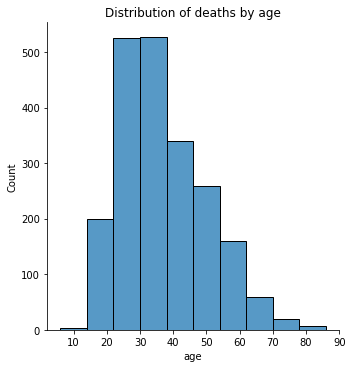

In [18]:
sns.displot(data.age, bins= 10)
plt.title("Distribution of deaths by age");

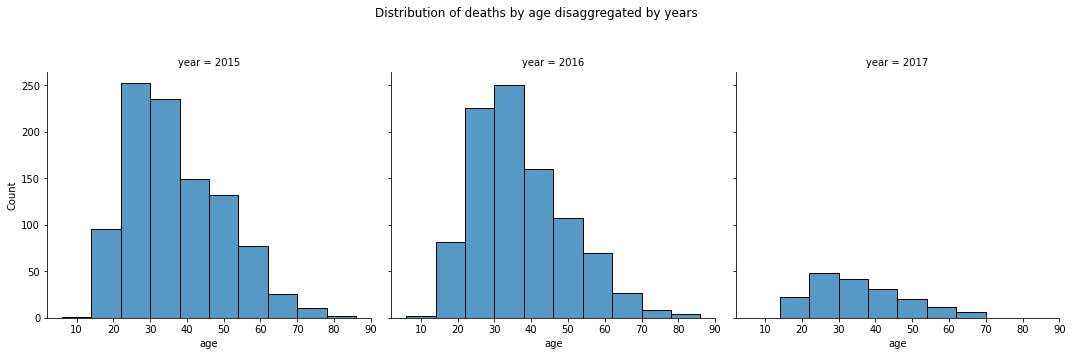

In [19]:
ax = sns.displot(data = data, x = 'age', bins = 10, col = 'year')
ax.fig.subplots_adjust(top=.8)
ax.fig.suptitle('Distribution of deaths by age disaggregated by years');

The most number of deaths due to police brutality is between the early twenties and mid-fifties. This trend is consistent for 2015, 2016 and even 2017.

In [20]:
gender = data[data.gender != 'unknown']

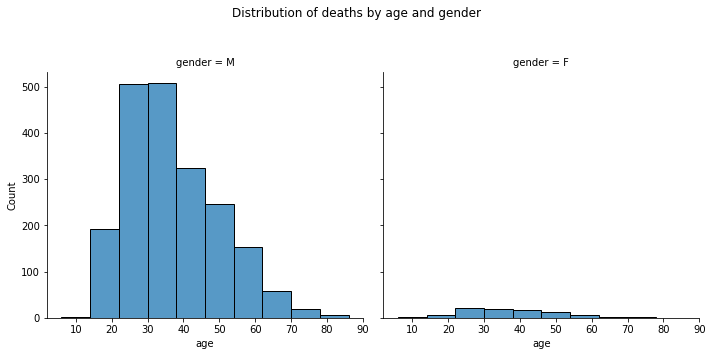

In [21]:
ax = sns.displot(data = gender, x = 'age', bins = 10, col = 'gender')
ax.fig.subplots_adjust(top=.8)
ax.fig.suptitle('Distribution of deaths by age and gender');

The number of males fatally affected by police brutality is signific antly higher than the number of females. However the age distribution is similar for both genders.

**Analysing level of threat**

Classifying the armed column into 3 classes:
1.   Armed - indicates that the victim was armed with some sort of implement that a police officer believed could inflict harm
2.   Unarmed - the victim was not armed
3.   Undetermined - it is not known whether or not the victim had a weapon


In [22]:
armed_list = list(data['armed'].unique())
armed_list.remove('unarmed')
armed_list.remove('undetermined')

In [23]:
data['armed_class'] = data['armed']
data['armed_class'] = data['armed_class'].replace(armed_list, 'armed')

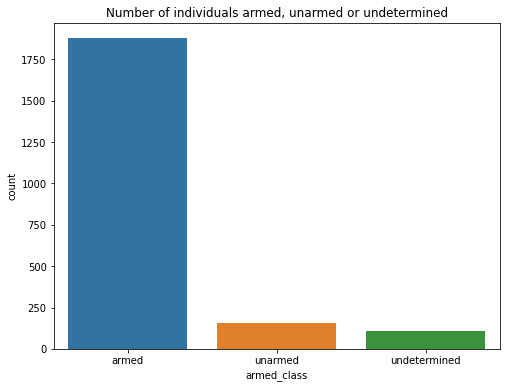

In [24]:
plt.figure(figsize = (8, 6))
sns.countplot(data = data, x = 'armed_class')
plt.title("Number of individuals armed, unarmed or undetermined");

A more victims were armed.

In [25]:
arms = data.loc[(data['armed'] != 'unarmed') & (data['armed'] != 'undetermined')]

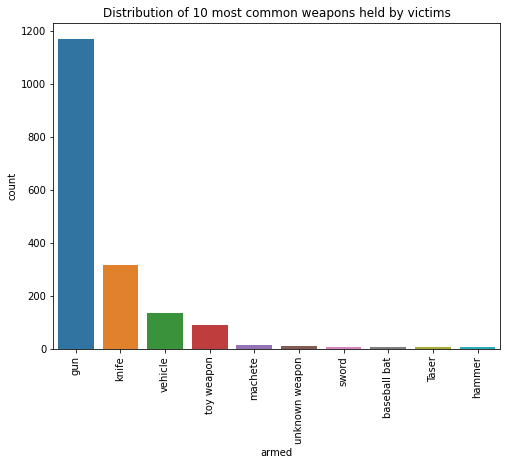

In [26]:
plt.figure(figsize = (8, 6))
sns.countplot(data = arms, x = 'armed', order= arms.armed.value_counts().iloc[:10].index)
plt.xticks(rotation = 90)
plt.title('Distribution of 10 most common weapons held by victims');

The most common weapons held by victims are guns and knives.

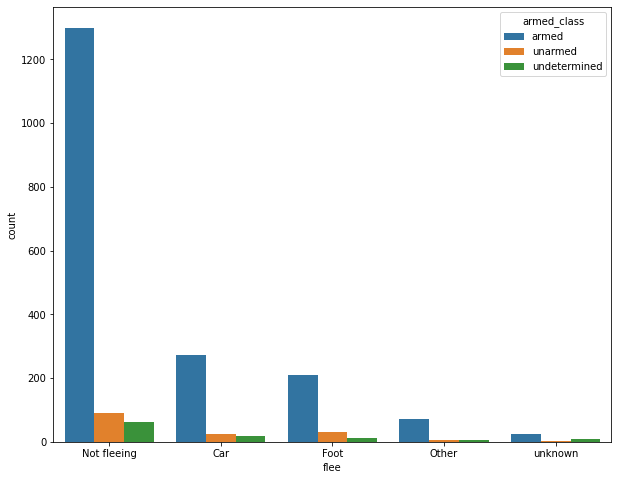

In [27]:
plt.figure(figsize = (10, 8))
sns.countplot(data = data, x = 'flee', hue= 'armed_class');

It appears that most people that were armed did not flee from the police. 

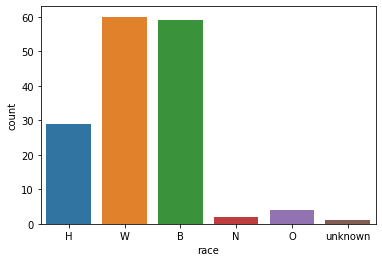

In [28]:
sns.countplot(data = data[data['armed_class'] == 'unarmed'], x = 'race');

##Merging with other datasets

In [29]:
pop_2015.head()

,Location,White,Black,Hispanic,Asian,American Indian/Alaska Native,Native Hawaiian/Other Pacific Islander,Multiple Races,Total
0,United States,192593600,37923800,55241300,16755300,1986900.0,466400.0,7810600,312777900
1,Alabama,3131400,1251500,188000,55300,16300.0,NaN,86500,4730100
2,Alaska,435400,22900,47600,49000,98700.0,2800.0,51000,707500
3,Arizona,3714900,264200,2045900,207300,270800.0,8900.0,143100,6655100
4,Arkansas,2106000,446400,204300,39000,18000.0,6100.0,62600,2882300


The population data for 2015, 2016 and 2017 shows the population of each US state by race. 

In [30]:
pop_data = pd.concat([pop_2015, pop_2016, pop_2017], keys=['2015', '2016', '2017'])

Qualifying the other races not addressed in our dataset as 'other' 

In [31]:
pop_data['Other'] = pop_data['Native Hawaiian/Other Pacific Islander'] + pop_data['Multiple Races']
pop_data.reset_index(inplace=True)
pop_data = pop_data.drop(['Native Hawaiian/Other Pacific Islander', 'Multiple Races', 'level_1'], axis= 1)
pop_data = pop_data.rename(columns= {'American Indian/Alaska Native':'Native American', 'level_0':'year', 'Location':'state'})

Restructure the dataset.

In [32]:
pop_data_melted = pd.melt(pop_data, id_vars= ['year', 'state', 'Total'], value_vars= ['White', 'Black','Hispanic', 'Asian', 'Native American' ], var_name='race', value_name='race_pop')

In [33]:
pop_data_melted['year'] = pd.to_numeric(pop_data_melted['year'])

Calculate the ratio of each race to the total population by states

In [34]:
pop_data_melted['race_per_pop'] = pop_data_melted['race_pop']/pop_data_melted['Total']

Converting the race codes to the full meaning.
The metadata defines the race classes like this:
1. W - White, non-hispanic
2. B - Black, non-hispanic
3. A - Asian
4. N - Native American
5. O - Other
6. None - Unknown

In [35]:
race_dict = {'B':'Black', 'W': 'White', 'A':'Asian', 'N':'Native American', 'H':'Hispanic', 'O':'Other', 'None': 'Unknown'}
data['race_full'] = data['race'].replace(race_dict)

Converting the states codes too

In [36]:
states_dict = states_df.set_index('state').to_dict()['name']
data['state_full'] = data['state'].replace(states_dict)

Grouping the main data by state and race

In [37]:
states_data = data.groupby(['year', 'state_full', 'race_full'])['id'].count()
states_data = states_data.reset_index().rename(columns= {'id':'count', 'state_full':'state', 'race_full':'race'})  

Join with population data

In [38]:
joined_data = pd.merge(states_data, pop_data_melted, on= ['year', 'state', 'race'], how= 'left')

In [39]:
joined_data['deaths_by_race_pop'] = joined_data['count']/joined_data['race_per_pop']

In [40]:
joined_data['deaths_by_race_per_hundred_thousand'] = round(joined_data['deaths_by_race_pop'] * 1000000, 2)

In [41]:
joined_data.head()

,year,state,race,count,Total,race_pop,race_per_pop,deaths_by_race_pop,deaths_by_race_per_hundred_thousand
0,2015,Alabama,Black,6,4730100.0,1251500.0,0.264582,22.677267,22677267.28
1,2015,Alabama,White,11,4730100.0,3131400.0,0.662016,16.615923,16615922.59
2,2015,Alaska,Native American,2,707500.0,98700.0,0.139505,14.336373,14336372.85
3,2015,Alaska,White,2,707500.0,435400.0,0.615406,3.249885,3249885.16
4,2015,Arizona,Black,1,6655100.0,264200.0,0.039699,25.189629,25189629.07


**Number of deaths by states**

In [42]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,armed_class,race_full,state_full
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,2015,January,armed,Asian,Washington
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,2015,January,armed,White,Oregon
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,2015,January,unarmed,Hispanic,Kansas
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,2015,January,armed,White,California
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,2015,January,armed,Hispanic,Colorado


In [43]:
states_count = data.groupby(['year','state_full'])['id'].count().reset_index()
states_count.rename(columns={'state_full':'state', 'id':'number_of_deaths'} , inplace=True)

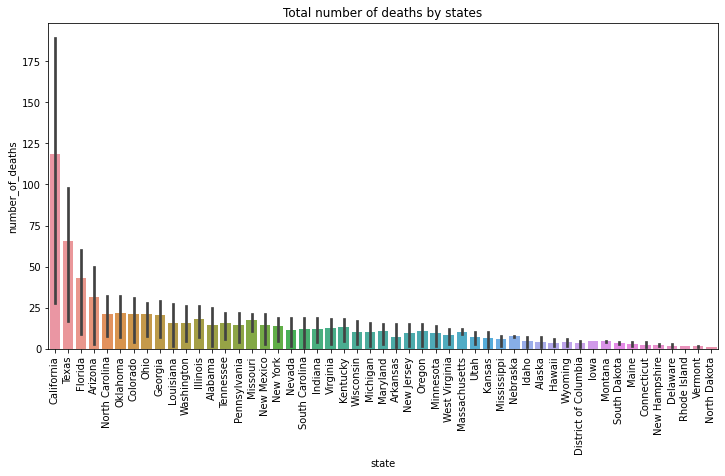

In [106]:
plt.figure(figsize = (12, 6))
sns.barplot(y='number_of_deaths', x= 'state', data = states_count.sort_values(by = ['number_of_deaths'], ascending = False))
plt.xticks(rotation = 90)
plt.title('Total number of deaths by states');

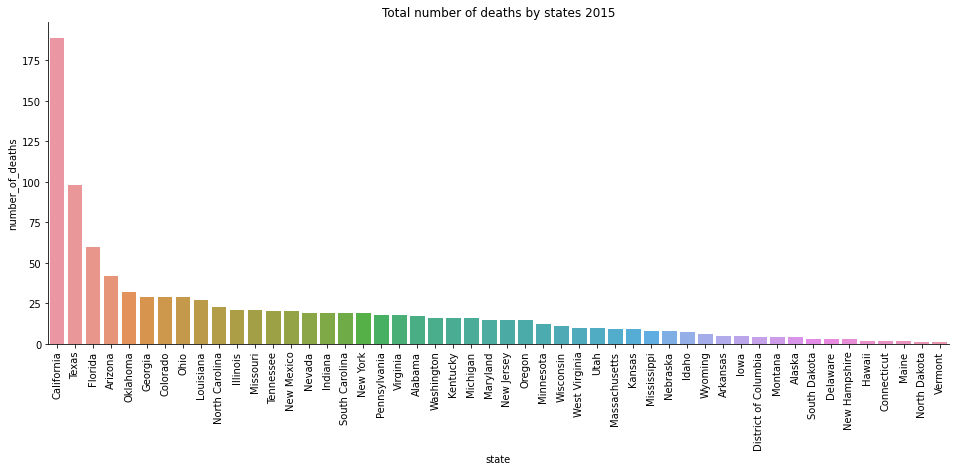

In [45]:
sns.catplot(y='number_of_deaths', x= 'state', kind='bar',  aspect=4/1.5, data = states_count[states_count['year']==2015].sort_values(by = ['number_of_deaths'], ascending = False))
plt.xticks(rotation = 90)
plt.title('Total number of deaths by states 2015');

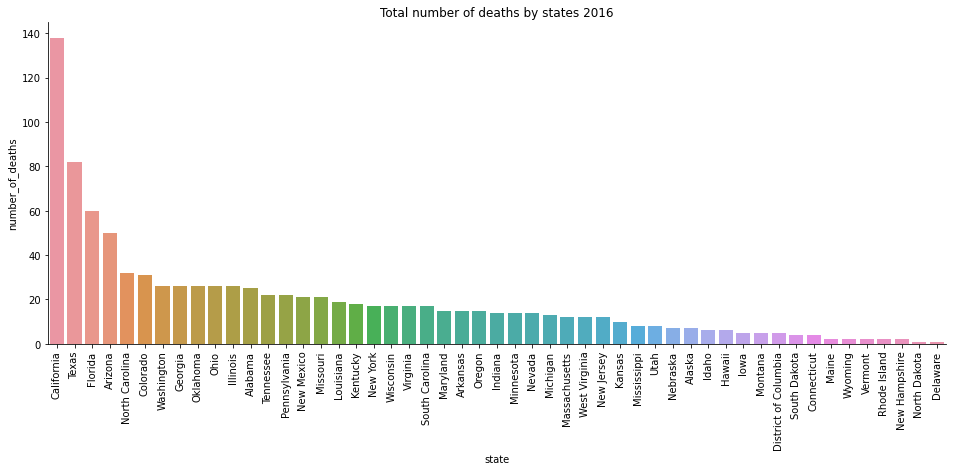

In [46]:
sns.catplot(y='number_of_deaths', x= 'state', kind='bar',  aspect=4/1.5, data = states_count[states_count['year']==2016].sort_values(by = ['number_of_deaths'], ascending = False))
plt.xticks(rotation = 90)
plt.title('Total number of deaths by states 2016');

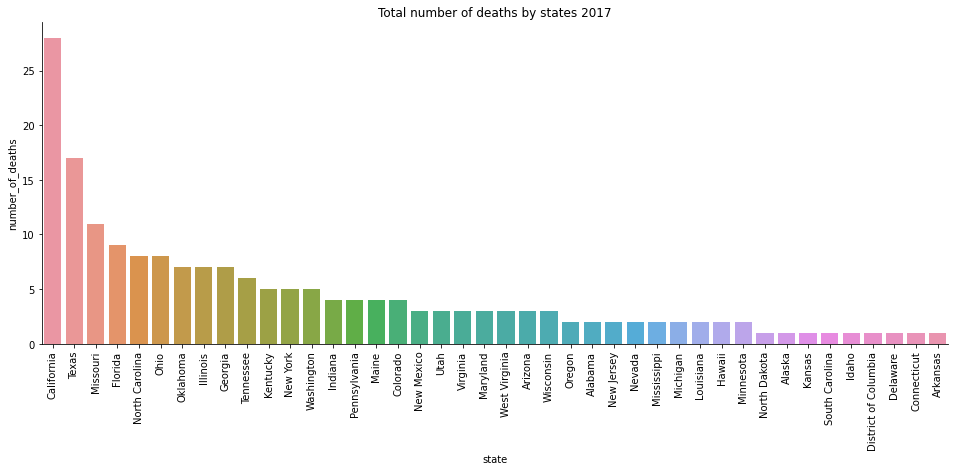

In [47]:
sns.catplot(y='number_of_deaths', x= 'state', kind='bar',  aspect=4/1.5, data = states_count[states_count['year']==2017].sort_values(by = ['number_of_deaths'], ascending = False))
plt.xticks(rotation = 90)
plt.title('Total number of deaths by states 2017');

For 2015, 2016 and 2017, California, Texas and Florida consistently reported the highest number of deaths due to police brutality. 

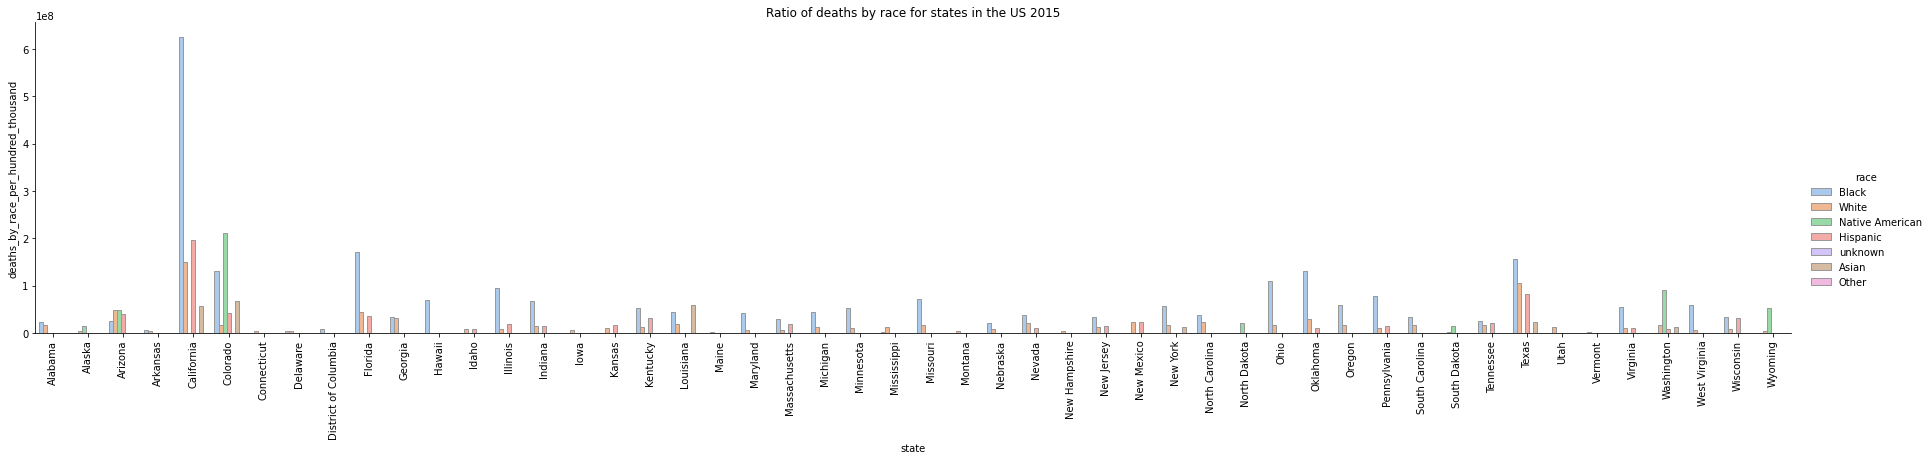

In [48]:
sns.catplot(y='deaths_by_race_per_hundred_thousand', x= 'state', hue='race', kind='bar', orient= 'v', edgecolor=".6",palette="pastel",
            data= joined_data.loc[joined_data['year'] == 2015], aspect=50/10)
plt.xticks(rotation = 90)
plt.title('Ratio of deaths by race for states in the US 2015');

When comparing the number of deaths to the population by race, it is obvious that black race is the most affected in most states. In states like Colorado, Washington, and North and South Dakota, and Wyoming, the Native Americans are most affected.


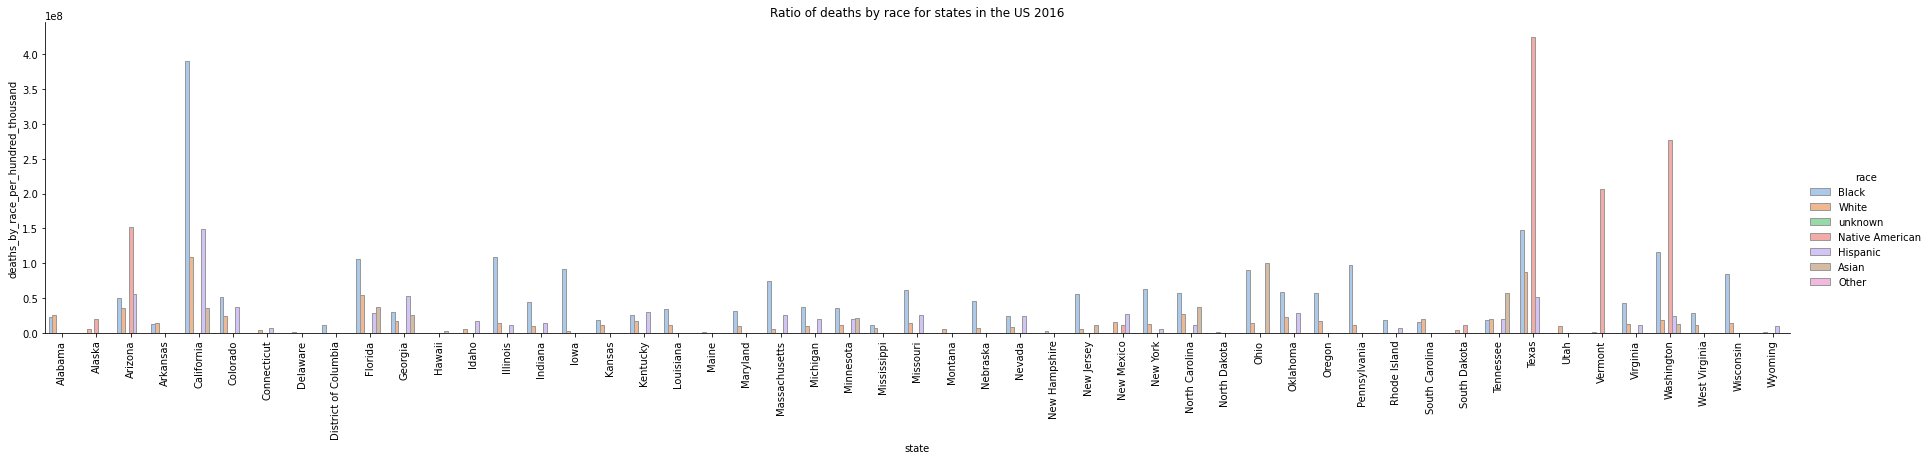

In [49]:
sns.catplot(y='deaths_by_race_per_hundred_thousand', x= 'state', hue='race', kind='bar', orient= 'v', edgecolor=".6",palette="pastel",
            data= joined_data.loc[joined_data['year'] == 2016], aspect=50/10)
plt.xticks(rotation = 90)
plt.title('Ratio of deaths by race for states in the US 2016');

Just like 2015, Black people seem to be disporportionatley affected by police brutality in most states. Native americans are affected in states like Texas, Vermont, Washington, and Arizona.

Calculating the probability of other races being suject to police brutality compared to whites

In [50]:
race_agg = joined_data.groupby('race').agg({'count':'sum','race_pop':'sum'})
race_agg.drop(index=['unknown', 'Other'], axis=0, inplace=True)

In [51]:
race_agg['death_by_race'] = race_agg['count']/ race_agg['race_pop']

In [52]:
white = race_agg.death_by_race[race_agg.index == 'White'][0]
race_agg['ratio_to_white'] = round(race_agg['death_by_race'] / white , 2)

In [53]:
race_agg

,count,race_pop,death_by_race,ratio_to_white
race,,,,
Asian,33,26179100.0,0.000001,0.64
Black,540,105278200.0,0.000005,2.61
Hispanic,367,137412300.0,0.000003,1.36
Native American,28,1718000.0,0.000016,8.29
White,1041,529251600.0,0.000002,1.00


Native americans are 8 times more likely to be subject to fatal police shootings than a white person. Blacks are 2.6 times more likely and Hispanics are 1.36 times more likely. Asians are 0.64 times less likely to be subject to police brutality than whites.

**Relationship between gun control grades by state and number of victims in possession of guns**

In [54]:
joined_gun_data = pd.merge(data, gun_control,left_on= ['year', 'state_full'], right_on=['year', 'state'])
joined_gun_data.drop(columns=['state_y'], axis = 1, inplace = True)

In [55]:
joined_gun_data = joined_gun_data[joined_gun_data['armed']== 'gun']
joined_gun_data = joined_gun_data.groupby(['year','state_full', 'grade'])['id'].count().reset_index()
joined_gun_data.rename(columns={'id':'count', 'state_full':'state'},inplace=True )

In [56]:
hue_order = ['A', 'B', 'C', 'D', 'E','F']
xlabels = joined_gun_data['state'].unique()

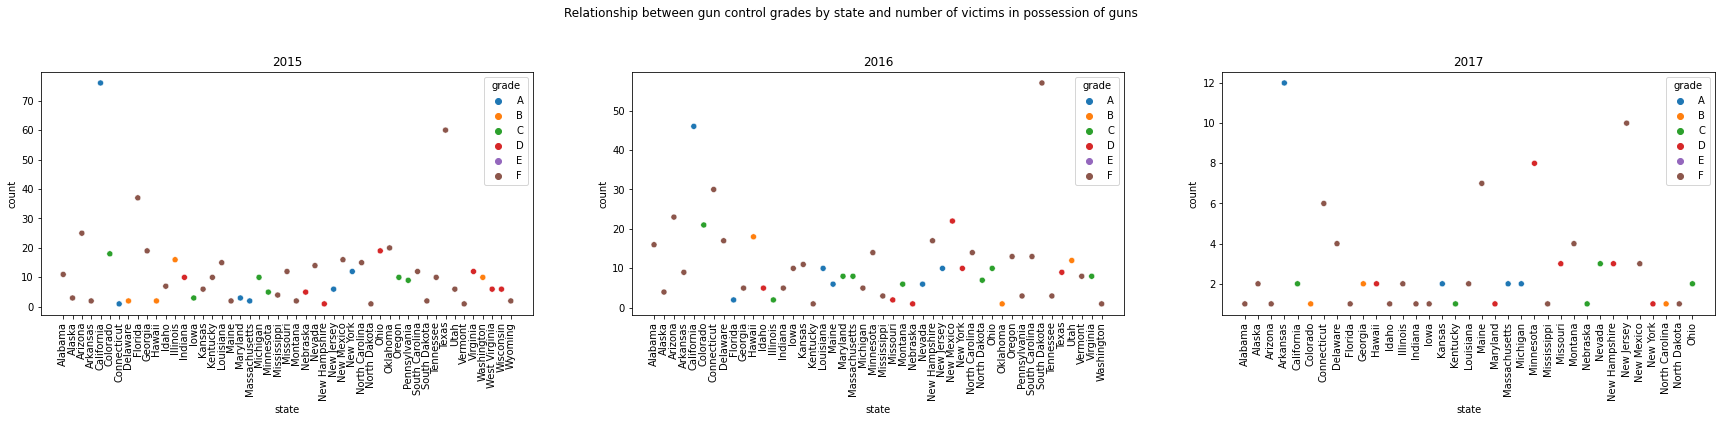

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(30, 5))
sns.scatterplot(ax=axes[0], data = joined_gun_data[joined_gun_data['year']== 2015], x= 'state', y= 'count', hue= 'grade', hue_order= hue_order )
axes[0].set_xticklabels( xlabels, rotation= 90 )
axes[0].set_title( '2015' )

sns.scatterplot(ax=axes[1], data = joined_gun_data[joined_gun_data['year']== 2016], x= 'state', y= 'count', hue= 'grade', hue_order= hue_order )
axes[1].set_xticklabels( xlabels, rotation= 90 )
axes[1].set_title( '2016' )


sns.scatterplot(ax=axes[2], data = joined_gun_data[joined_gun_data['year']== 2017], x= 'state', y= 'count', hue= 'grade', hue_order= hue_order )
axes[2].set_xticklabels( xlabels, rotation= 90 )
axes[2].set_title( '2017' );
fig.subplots_adjust(top=.8)
plt.suptitle("Relationship between gun control grades by state and number of victims in possession of guns");

There appears to be no relationship between number of gun control grades by state and number of victims in possession of guns.


# Hypothesis Testing

In 2015, certain measures where implemented by President Barack Obama to reduce police brutality rate in the US. Read more about it here - https://en.wikipedia.org/wiki/President%27s_Task_Force_on_21st_Century_Policing.

The hypothesis testing is done to check if the reduction in the number of deaths due to police shooting is statistically significant.

*  Null hypothesis, Ho: There is no significant difference between the number of deaths due to police shooting in 2015 to that of 2016.
*  Alternate hypothesis, Ha: There is a significant difference between the number of deaths due to police shooting in 2015 and 2016.

A two-sample proportions z-test will be used with a signifance of 95%.

In [58]:
year_agg = joined_data.groupby('year').agg({'count':'sum', 'race_pop':'sum'})


In [59]:
year_agg.drop(index=2017, axis = 0, inplace=True)
year_agg

,count,race_pop
year,,
2015,991,281596900.0
2016,962,287624300.0


In [60]:
def sig_test(significance, p_value):
  if p_value > significance:
   print ("Fail to reject the null hypothesis!")
  else:
   print ("Reject the null hypothesis - this suggests the alternative hypothesis is true")

In [61]:
z_test,z_test_pval = proportions_ztest(year_agg['count'], year_agg['race_pop'])
print(f'z_val is {z_test}', f'p_val is {z_test_pval}')

z_val is 1.1242317141726141 p_val is 0.26091473862615966


In [62]:
sig_test(0.05, z_test_pval)

Fail to reject the null hypothesis!


The stest shows that the change is not statistic all significant.

# Dimensionality Reduction

##Data preparation for reduction and regression

In [63]:
reg_data = pd.merge(data, joined_data, left_on= ['year', 'state_full', 'race_full'], right_on=['year', 'state', 'race'])

In [64]:
reg_data.dropna(inplace = True)
reg_data.drop(columns=['race_x', 'state_x', 'armed', 'month', 'year', 'date', 'state_full', 'race_full', 'count', 'race_pop', 'deaths_by_race_per_hundred_thousand', 'name', 'deaths_by_race_pop', 'Total', 'id'], axis= 1, inplace=True)
reg_data.rename(columns= {'state_y': 'state', 'race_y':'race'}, inplace=True)

##Data encoding

Using label encoder for the y-axis for modelling (logistic regression)

In [65]:
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(reg_data['race'])
reg_data['race_encoded'] = label_encoder.transform(reg_data['race'])

In [66]:
x = reg_data.drop(columns=['race', 'race_encoded'], axis= 1)
y = reg_data['race_encoded']

Using get_dummies to encode categorical data

In [67]:
categorical = x.select_dtypes(exclude='float')
x_categorical = pd.get_dummies(categorical)

In [68]:
x_numerical = x.select_dtypes(include='float')
x = pd.concat([x_categorical, x_numerical], axis= 1)

Splitting the data into test and train datasets

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2, stratify=y)

In [70]:
x_train_numerical = x_train.select_dtypes(include='float')
x_test_numerical = x_test.select_dtypes(include='float')

Using power transformer to normalize the numerical fields.

In [71]:
for c in x_numerical.columns:
    pt = PowerTransformer()
    x_numerical.loc[:, c] = pt.fit_transform(np.array(x_numerical[c]).reshape(-1, 1))
    x_train_numerical.loc[:, c] = pt.fit_transform(np.array(x_train_numerical[c]).reshape(-1, 1))
    x_test_numerical.loc[:, c] = pt.fit_transform(np.array(x_test_numerical[c]).reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [72]:
x_train_categorical = x_train.select_dtypes(exclude='float')
x_test_categorical = x_test.select_dtypes(exclude='float')

In [73]:
x_train = pd.concat([x_train_categorical, x_train_numerical], axis= 1)
x_test = pd.concat([x_test_categorical, x_test_numerical], axis= 1)
x_data = pd.concat([x_categorical, x_numerical], axis= 1)

##PCA

In [74]:
pca = PCA()
pc = pca.fit_transform(x_data)

In [75]:
pvr = pca.explained_variance_ratio_.cumsum()

In [76]:
len(pvr)

1234

There are 1,293 pca components.To choose the optimal number of components to use, I will select the number of components at which the cumulative sum of the explained variance is 0.90.

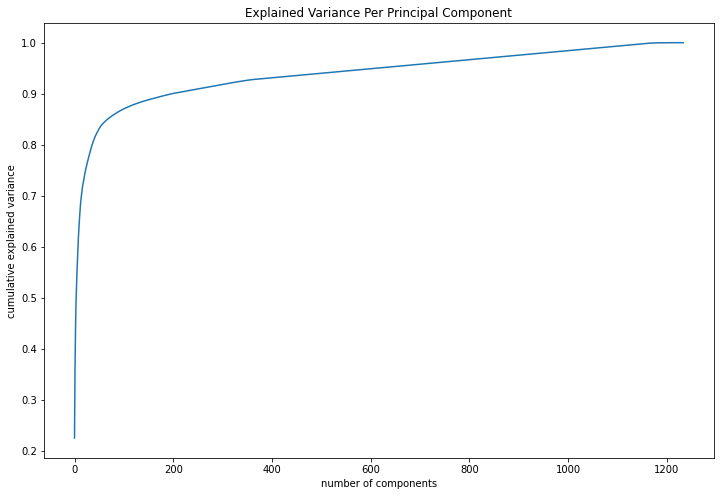

In [77]:
num_components=len(pca.explained_variance_ratio_)
ind= np.arange(len(pca.explained_variance_ratio_))
vals=pca.explained_variance_ratio_
cumvals= pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(12,8))
ax = plt.subplot(111)

ax.plot( ind , cumvals);


plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained Variance Per Principal Component');

200 components will be used for the modelling.

Plotting the first 2 PCA components by race.

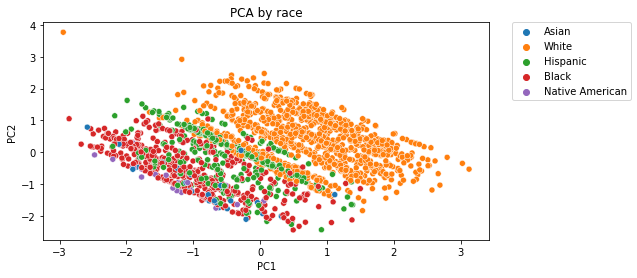

In [78]:
reg_data['PC1']= pc[:, 0]
reg_data['PC2'] = pc[:, 1]

plt.figure(figsize= (8,4));
sns.scatterplot(x= 'PC1', y= 'PC2', hue= 'race', data= reg_data);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.title('PCA by race');

##T-SNE

In [79]:
tsne = TSNE(learning_rate = 50)
tsne_features = tsne.fit_transform(x_data)

In [80]:
reg_data['tsne_x'] = tsne_features[:,0]
reg_data['tsne_y'] = tsne_features[:,1]

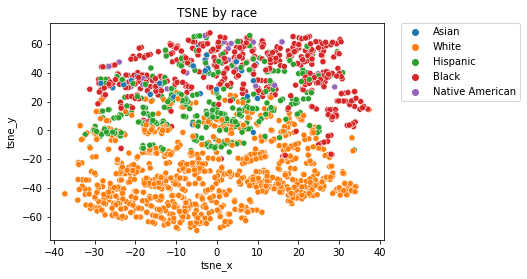

In [81]:
sns.scatterplot(x = "tsne_x", y = "tsne_y", hue = "race", data =reg_data);
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
plt.title('TSNE by race');

#Modelling - Logistic Regression

In [82]:
pca = PCA(n_components= 200)

In [83]:
pca_x_train = pca.fit(x_train)
pca_x_train = pca.transform(x_train)
pca_x_test = pca.transform(x_test)

In [84]:
logisticRegr = LogisticRegression()

In [85]:
logisticRegr.fit(pca_x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
y_predict = logisticRegr.predict(pca_x_test)

In [87]:
accuracy = accuracy_score(y_test, y_predict)
accuracy

0.8618090452261307

The accuracy of the logistic model is 0.86

**Visualizing the confusion matrix of the logistic regression**

Reversing the y-axis encoding 

In [88]:
reversed_pca = list(label_encoder.inverse_transform(y_predict))
reversed_test = list(label_encoder.inverse_transform(y_test))

In [89]:
unique_label = np.unique([reversed_test, reversed_pca])
confusion_mtrx = pd.DataFrame(
    confusion_matrix(reversed_test, reversed_pca, labels=unique_label), 
    index=['true:{:}'.format(x) for x in unique_label], 
    columns=['pred:{:}'.format(x) for x in unique_label]
)

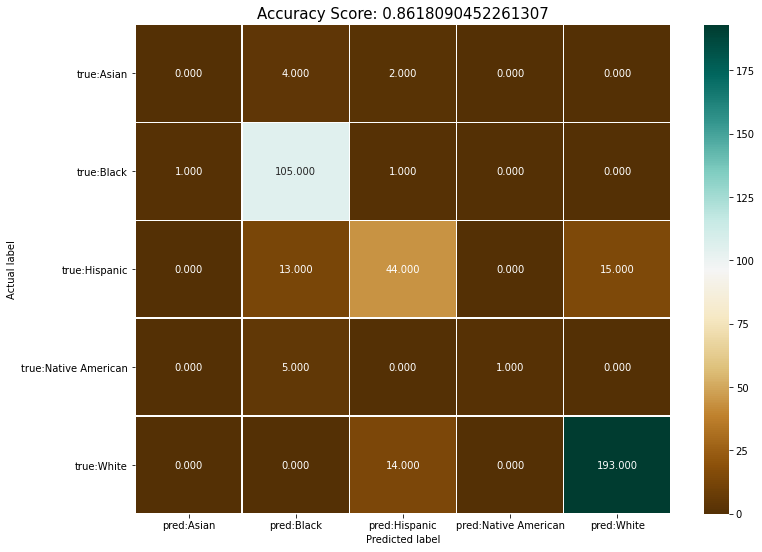

In [90]:
plt.figure(figsize=(12,9))
sns.heatmap(confusion_mtrx , annot=True, fmt=".3f", linewidths=.5, cmap = 'BrBG');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

The model was ale to adequately predict the race of police shooting cases with an accuracy of 86%. It predominantly predicted cases for white and blacks correctly.

#Modelling- Clustering

In [91]:
pc_data = pc[:, :200]

**Elbow method to determine the optimal number of clusters**

In [92]:
n_clusters = range(1, 10) #number of clusters to test
sum_squared_distances = []
for i in n_clusters:
  k_means = KMeans(n_clusters = i)
  k_means = k_means.fit(pc_data)
  sum_squared_distances.append(k_means.inertia_)

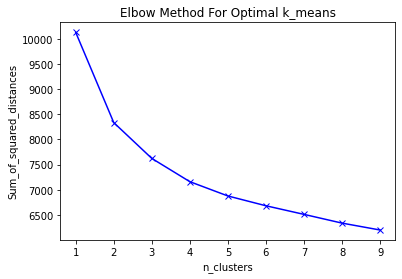

In [93]:
plt.plot(n_clusters, sum_squared_distances, 'bx-')
plt.xlabel('n_clusters')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k_means')
plt.show()

From the elbow plot, the optimal number of clusters to use is 4.

**Visualizing the clusters**

In [94]:
kmeans = KMeans(n_clusters= 4)

In [95]:
label = kmeans.fit_predict(pc_data)

In [96]:
centroids = kmeans.cluster_centers_

**Visualizing the clusters**

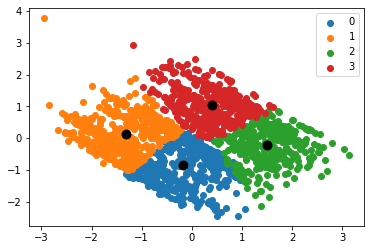

In [97]:
#Getting unique labels
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(pc_data[label == i , 0] , pc_data[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [98]:
reg_data['clustered'] = label

In [99]:
cluster0 = reg_data[reg_data['clustered'] == 0]
cluster1 = reg_data[reg_data['clustered'] == 1]
cluster2 = reg_data[reg_data['clustered'] == 2]
cluster3 = reg_data[reg_data['clustered'] == 3]

In [100]:
cluster0.head()

,manner_of_death,age,gender,city,signs_of_mental_illness,threat_level,flee,body_camera,armed_class,state,race,race_per_pop,race_encoded,PC1,PC2,tsne_x,tsne_y,clustered
0,shot,53.0,M,Shelton,True,attack,Not fleeing,False,armed,Washington,Asian,0.079197,0,0.035427,-1.933135,-1.918691,39.668274,0
16,shot,32.0,M,San Francisco,True,attack,Not fleeing,False,armed,California,White,0.378436,4,-0.187793,-0.079823,-1.930946,5.736576,0
18,shot,36.0,M,Hemet,False,attack,Not fleeing,False,armed,California,White,0.378436,4,-0.018226,-0.312281,2.619966,7.947299,0
19,shot,42.0,M,Apple Valley,True,attack,Not fleeing,False,armed,California,White,0.378436,4,0.364254,-0.623069,0.974254,1.616403,0
20,shot,59.0,M,Chino,False,other,Car,False,armed,California,White,0.378436,4,0.837099,-1.185740,5.304334,19.787857,0


In [101]:
cluster1.head()

,manner_of_death,age,gender,city,signs_of_mental_illness,threat_level,flee,body_camera,armed_class,state,race,race_per_pop,race_encoded,PC1,PC2,tsne_x,tsne_y,clustered
14,shot and Tasered,23.0,M,Wichita,False,other,Not fleeing,False,unarmed,Kansas,Hispanic,0.115742,2,-1.697893,-0.090069,-22.611397,23.008131,1
15,shot,21.0,M,Kansas City,False,attack,Car,False,armed,Kansas,Hispanic,0.115742,2,-1.907997,0.144142,28.220253,38.393410,1
17,shot and Tasered,25.0,M,Stockton,False,attack,Not fleeing,False,armed,California,White,0.378436,4,-0.737959,0.401019,-5.937037,5.349278,1
21,shot,26.0,M,Calimesa,False,attack,Not fleeing,False,armed,California,White,0.378436,4,-0.666069,0.328264,-1.333064,8.976912,1
22,shot,23.0,M,San Bernardino,False,attack,Car,False,armed,California,White,0.378436,4,-1.036393,0.682483,12.946326,15.002964,1


In [102]:
cluster2.head()

,manner_of_death,age,gender,city,signs_of_mental_illness,threat_level,flee,body_camera,armed_class,state,race,race_per_pop,race_encoded,PC1,PC2,tsne_x,tsne_y,clustered
1,shot,47.0,M,Aloha,False,attack,Not fleeing,False,armed,Oregon,White,0.767113,4,1.591639,0.237493,-5.086979,-64.517914,2
3,shot,49.0,M,Medford,True,attack,Not fleeing,False,armed,Oregon,White,0.767113,4,1.745990,0.152309,-3.447875,-63.640636,2
5,shot,49.0,M,Eugene,True,attack,Not fleeing,False,armed,Oregon,White,0.767113,4,1.746542,0.151454,-3.792925,-64.283531,2
6,shot,49.0,M,Eugene,False,attack,Not fleeing,False,armed,Oregon,White,0.767113,4,1.677412,0.152787,-4.404403,-64.552773,2
7,shot,55.0,M,Wilderville,False,attack,Not fleeing,False,armed,Oregon,White,0.767113,4,1.915993,-0.083804,-5.632182,-64.466568,2


In [103]:
cluster3.head()

,manner_of_death,age,gender,city,signs_of_mental_illness,threat_level,flee,body_camera,armed_class,state,race,race_per_pop,race_encoded,PC1,PC2,tsne_x,tsne_y,clustered
2,shot,34.0,M,Colton,True,other,Not fleeing,False,armed,Oregon,White,0.767113,4,0.972127,0.899790,15.466223,-40.670120,3
4,shot and Tasered,36.0,M,Portland,True,other,Foot,False,armed,Oregon,White,0.767113,4,0.935993,0.889053,32.063011,-44.712967,3
8,shot,29.0,M,Portland,False,attack,Not fleeing,False,armed,Oregon,White,0.767113,4,0.614813,1.202755,-20.661356,-48.906147,3
9,shot,32.0,M,Josephine County,False,attack,Car,False,armed,Oregon,White,0.767113,4,0.680695,1.126359,-16.257357,-35.654819,3
12,shot,35.0,M,Salem,False,attack,Car,False,armed,Oregon,White,0.767113,4,0.860673,0.949518,-16.189472,-35.654438,3


# Conclusion and Recommendation

**List of issues**


1.   There is evidence of racial inequality in police profiling
2.   States such as California, Texas and Florida reportedly report high numbers of deaths due to police shootings.
3.   Sufficient data not availale to find any relationship between signs of mental illness and death by police shooting. 



**Recommendations**


1.   More socio-economic and biodemographic data of victims need to be collected 
2.   Efforts should be made to build trust between racial communities and Law enforcement.
3.   Law enforcement agencies should have comprehensive policies on the use of force especially for unarmed individuals.

